# Module 1

#### Importing Libraries, Loading and Exploring Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import sklearn

In [2]:
%matplotlib inline

In [3]:
credit_card_train=pd.read_csv('creditcard_train.csv')
credit_card_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Our data has {} rows and {} columns".format(credit_card_train.shape[0],credit_card_train.shape[1]))

Our data has 284657 rows and 31 columns


In [5]:
print('Fraud Transactions are {} out of a total transactions of {}'.format(credit_card_train[credit_card_train['Class']==1].shape[0], credit_card_train.shape[0]))

Fraud Transactions are 442 out of a total transactions of 284657


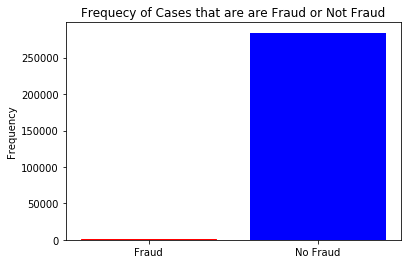

In [6]:
fraud=[credit_card_train[credit_card_train['Class']==1].shape[0],credit_card_train[credit_card_train['Class']==0].shape[0]]
plt.figure()
bar=plt.bar(['Fraud','No Fraud'],fraud,color='b')
plt.ylabel('Frequency')
plt.title('Frequecy of Cases that are are Fraud or Not Fraud')
bar[0].set_color('r')

#### The above histogram highlights that the data is highly unbalanced. Therefore later we will use undersampling to train the model.

#### Handling Missing Values

In [7]:
credit_card_train.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [8]:
sum(credit_card_train.isnull().values.any(axis=1))

798

#### A total of 798 missing values, all of them in V22 and V23. These 798 rows are insignificant in comparison to a total transactions of 284567

In [9]:
credit_card_train.dropna(axis=0,inplace=True)
credit_card_train.shape

(283859, 31)

In [10]:
print('Fraud Transactions are {} out of a total transactions of {}'.format(credit_card_train[credit_card_train['Class']==1].shape[0], credit_card_train.shape[0]))

Fraud Transactions are 442 out of a total transactions of 283859


#### No row with missing values was a case of fraud transaction therefore, dropping them was a good decison

In [11]:
credit_card_train.columns.values[1:30]

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

#### Outliers are checked and removed in the attributes metnioned above

In [12]:
df1=credit_card_train[credit_card_train['Class']==1]
df0=credit_card_train[credit_card_train['Class']==0]
features=credit_card_train.columns.values[1:30]
for i in features:
    des1=df1[i].describe()
    lower_bound1=des1[4]-2.5*(des1[6]-des1[4])
    upper_bound1=des1[4]+2.5*(des1[6]-des1[4])
    
    des0=df0[i].describe()
    lower_bound0=des0[4]-2.5*(des0[6]-des0[4])
    upper_bound0=des0[4]+2.5*(des0[6]-des0[4])
    
    credit_card_train.drop(credit_card_train[(( (credit_card_train[i]<lower_bound1) | (credit_card_train[i]>upper_bound1) )
                                             &
                                             (credit_card_train['Class']==1))
                                             |
                                             (( (credit_card_train[i]<lower_bound0) | (credit_card_train[i]>upper_bound0) )
                                             &
                                             (credit_card_train['Class']==0))].index, inplace=True)
    


In [13]:
credit_card_train.shape

(167999, 31)

In [14]:
print('Fraud Transactions are {} out of a total transactions of {}'.format(credit_card_train[credit_card_train['Class']==1].shape[0], credit_card_train.shape[0]))

Fraud Transactions are 258 out of a total transactions of 167999


#### Around 41% of the transactions of lost in the process of removing outliers. One might be wondering that it is not a good decision to remove them.

#### However, the percentage of fraudulent transactions in the data before removing outliers was 0.15571 (rounded to 5 decimal places). After removing outliters,  the percentage is still 0.15357
#### Therefore, as fraudulent transactions as a percentage of total haven't experienced a significant change, I decided to proceed with removing the outliers

# Module 2

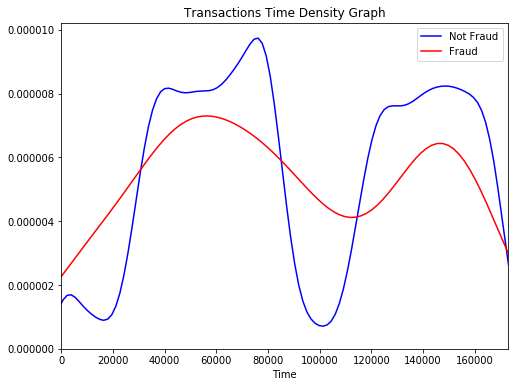

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(credit_card_train[credit_card_train['Class'] == 0]["Time"], color='b',hist = False, label = 'Not Fraud');
sns.distplot(credit_card_train[credit_card_train['Class'] == 1]["Time"], color='r',hist = False, label = 'Fraud');
plt.xlim([0,credit_card_train['Time'].max()])
plt.title('Transactions Time Density Graph', fontsize=12);
plt.legend()
plt.show()

#### Distributions of transactions over the course of time

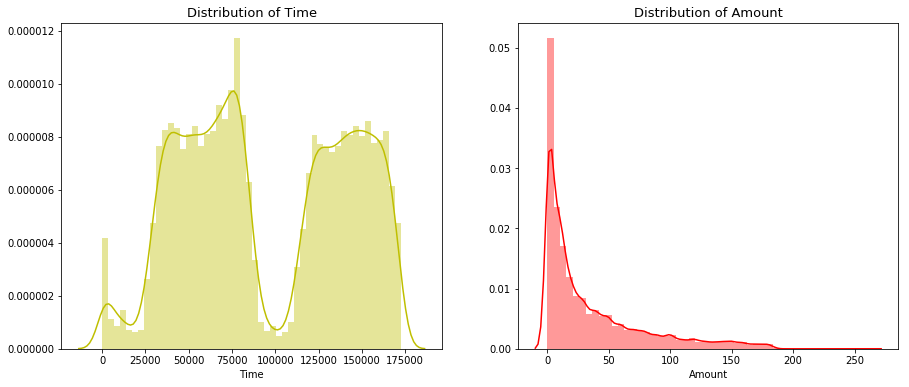

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(credit_card_train['Time'], ax=ax1, color='y')
ax2 = sns.distplot(credit_card_train['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13);
ax2.set_title('Distribution of Amount', fontsize=13);

#### Let's visualise the distributions of Time and Amount separately

#### Distribution of Time and Amount seperately visualised

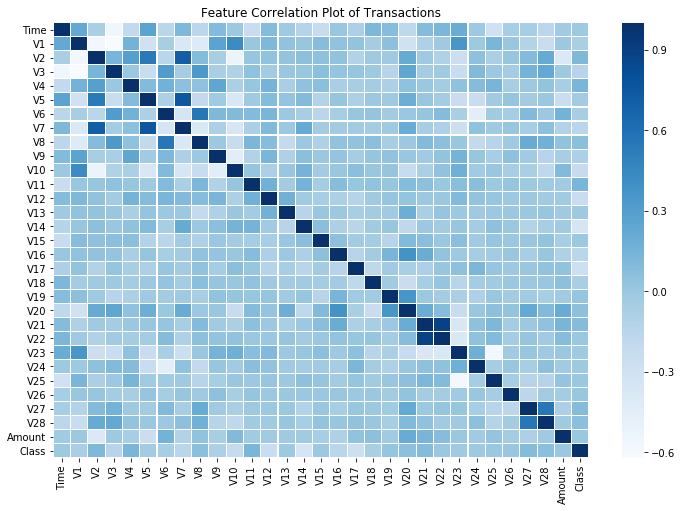

In [17]:
plt.figure(figsize=(12,8))
corr=credit_card_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap='Blues')
plt.title('Feature Correlation Plot of Transactions')
plt.show()

#### A heatmap highlighting correlations between all the attributes and also included the target columns.

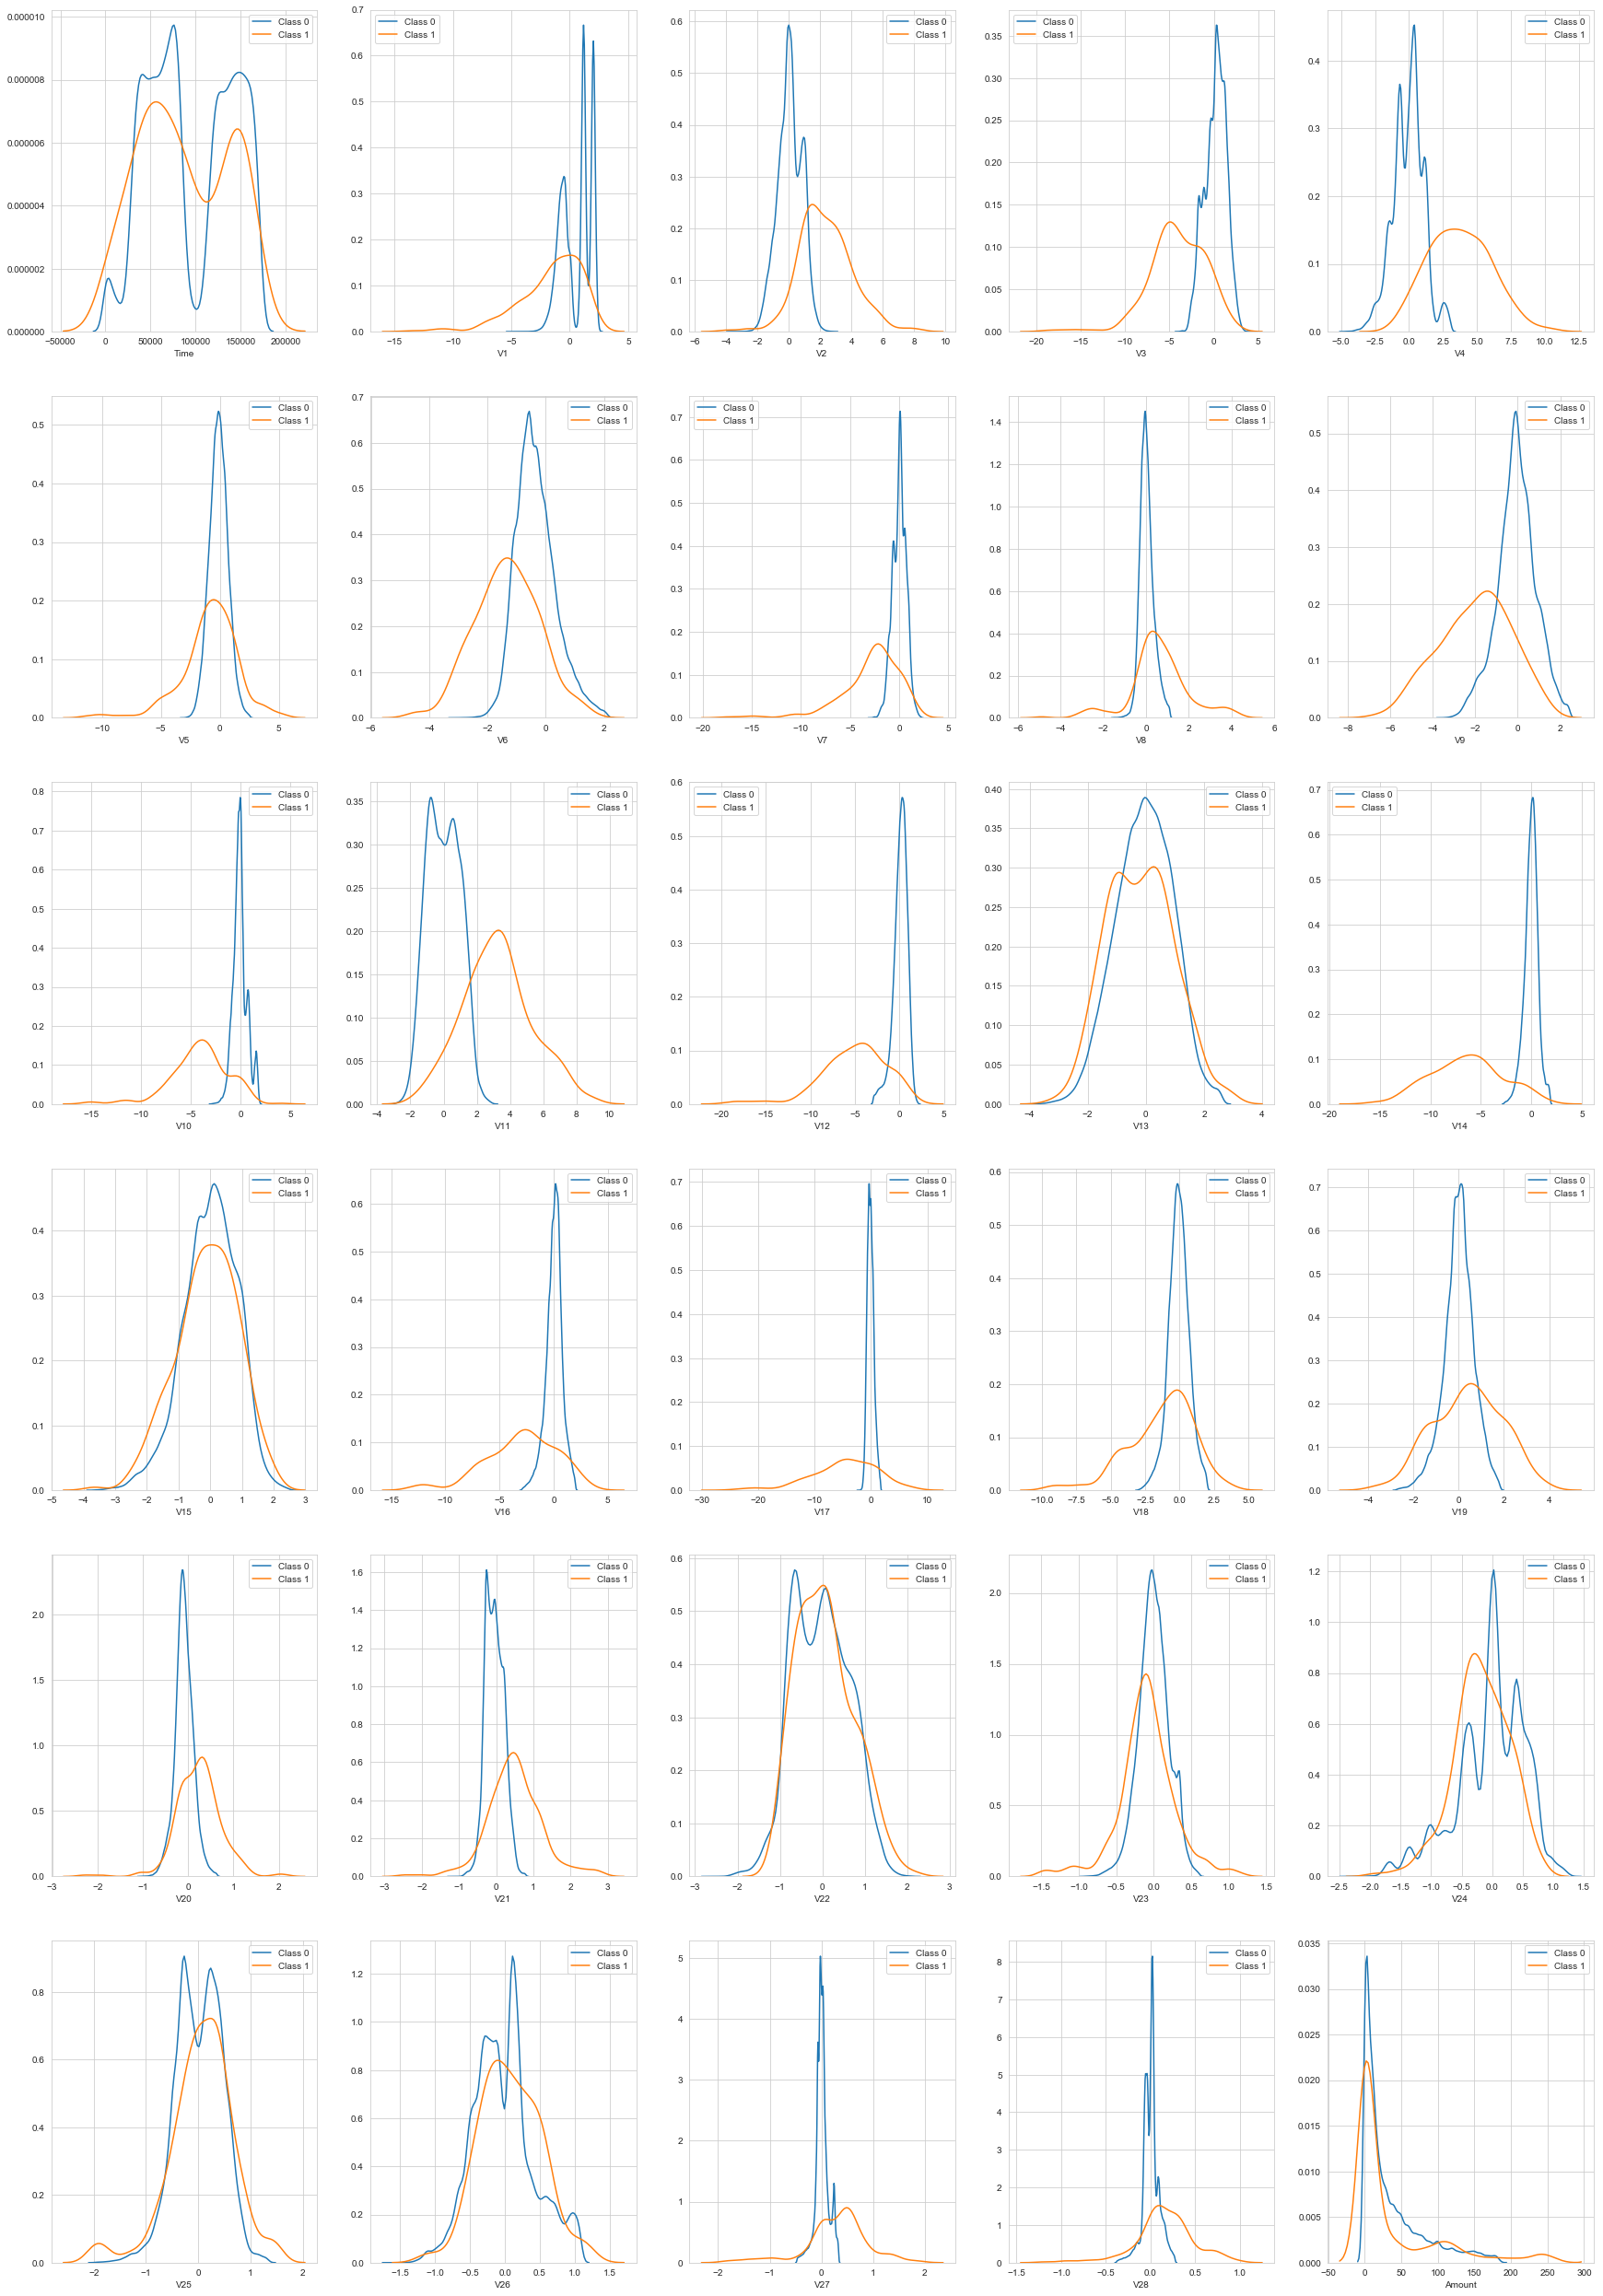

In [18]:
zero_class=credit_card_train.loc[credit_card_train['Class']==0]
one_class=credit_card_train.loc[credit_card_train['Class']==1]
counter=0
sns.set_style('whitegrid')
fig,ax=plt.subplots(6,5,figsize=(30,45))
for feature in credit_card_train.columns.values[0:30]:
    counter+=1
    plt.subplot(6,5,counter)
    sns.distplot(zero_class[feature],label='Class 0',hist=False)
    sns.distplot(one_class[feature],label='Class 1',hist=False)
    plt.xlabel(feature)
    plt.tick_params(axis='x',labelsize=10)
    plt.tick_params(axis='y',labelsize=10)
plt.show()

#### Features V4, V11, V12 and V14 have clearly separated distributions for Fraud and Not Fraud groups;

<Figure size 3600x1800 with 0 Axes>

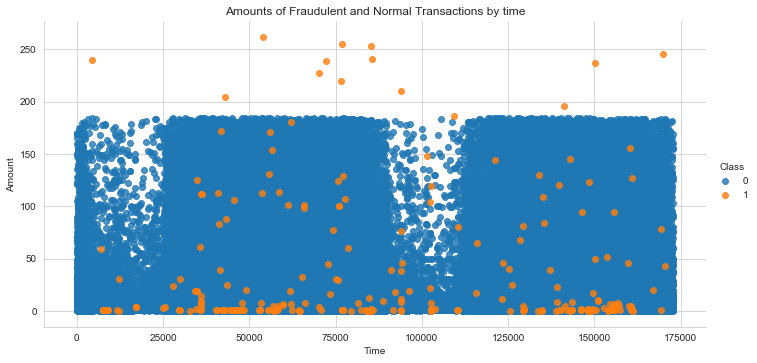

In [19]:
plt.figure(figsize=(12,6), dpi = 300);
sns.lmplot(y="Amount", x="Time",data=credit_card_train, hue='Class', fit_reg=False, aspect = 2, scatter_kws={'alpha':0.8})
plt.title("Amounts of Fraudulent and Normal Transactions by time",fontsize=12);
plt.show();

#### The plot shows that most fraud transactions were also of small amount with very few going about value of 200. We can also see a brief period of time where number of transactions decrease.

# Module 3

#### KMeans Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
k_means_df=credit_card_train.copy().drop(['Class'],axis=1)
df_PCA=credit_card_train.copy().drop(['Class'],axis=1)

In [21]:
scaler=StandardScaler()
scaler.fit(df_PCA)
scaled_data=scaler.transform(df_PCA)

In [22]:
kmeans=KMeans(n_clusters=2,random_state=1)
kmeans=kmeans.fit(scaled_data)

print('The clusters are:', kmeans.labels_)
print('The inertia is: ',kmeans.inertia_)

The clusters are: [0 1 0 ... 1 0 0]
The inertia is:  4589170.962996474


#### Finding optimum number of clusters

In [23]:
no_cluster=[i for i in range(2,21)]
inertia=[]

In [24]:
for i in no_cluster:
    kmeans1=KMeans(n_clusters=i,random_state=1)
    kmeans1=kmeans1.fit(k_means_df)
    iner=kmeans1.inertia_
    inertia.append(iner)
    print("The inertia for {} clusters is {}".format(i,iner))

The inertia for 2 clusters is 63167768995188.35
The inertia for 3 clusters is 34374034963657.47
The inertia for 4 clusters is 18730145852970.31
The inertia for 5 clusters is 12822586073000.057
The inertia for 6 clusters is 9331143784698.273
The inertia for 7 clusters is 6244216703622.425
The inertia for 8 clusters is 4907497223698.708
The inertia for 9 clusters is 3821780979023.5723
The inertia for 10 clusters is 3194470075305.214
The inertia for 11 clusters is 2660116352594.98
The inertia for 12 clusters is 2230170392155.1963
The inertia for 13 clusters is 1931685878043.9888
The inertia for 14 clusters is 1678008223249.331
The inertia for 15 clusters is 1488214143206.4597
The inertia for 16 clusters is 1322805893333.0776
The inertia for 17 clusters is 1173371266312.621
The inertia for 18 clusters is 1049642485369.9766
The inertia for 19 clusters is 937286333107.5621
The inertia for 20 clusters is 837995665085.9974


In [25]:
#sns.set_style('darkgrid')

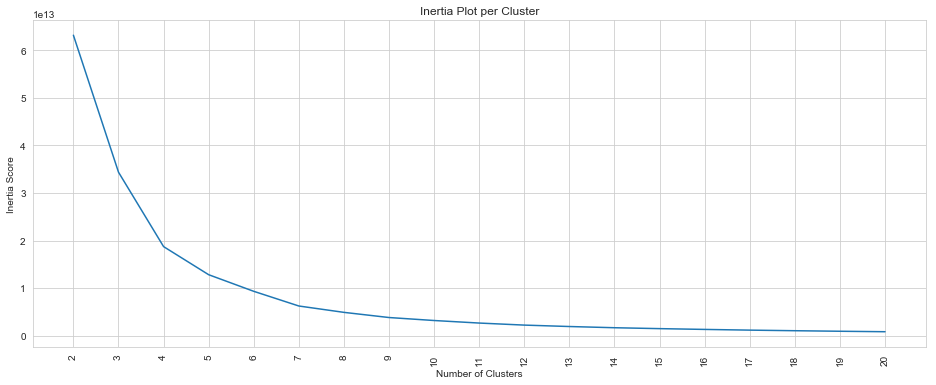

In [26]:
fig,(ax1)=plt.subplots(1,figsize=(16,6))
a=np.arange(len(no_cluster))
ax1.plot(a,inertia)
ax1.set_xticks(a)
ax1.set_xticklabels(no_cluster,rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per Cluster');

#### The lesser the inertia, the less internally coherent the clusters are. Therefore we should choose number of clusters at which the rate of fall of inertia score becomes stable. With reference to the above graph, I would choose number of clusters to be 7.

In [27]:
kmeans1=KMeans(n_clusters=7,random_state=5)
kmeans1=kmeans1.fit(k_means_df)

kmeans1.labels_

predictions=kmeans1.predict(k_means_df)

unique,counts=np.unique(predictions,return_counts=True)
counts=counts.reshape(1,7)

counts_df=pd.DataFrame(counts,columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7',])
counts_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,25822,30372,27829,23904,5398,28346,26328


#### Let's visualise with help of PCA

In [28]:
pca=PCA(n_components=2,random_state=75)
pca_data=pca.fit(scaled_data).transform(scaled_data)
print('The Explained Variance Ratio is: ',pca.explained_variance_ratio_)

The Explained Variance Ratio is:  [0.11819881 0.09563987]


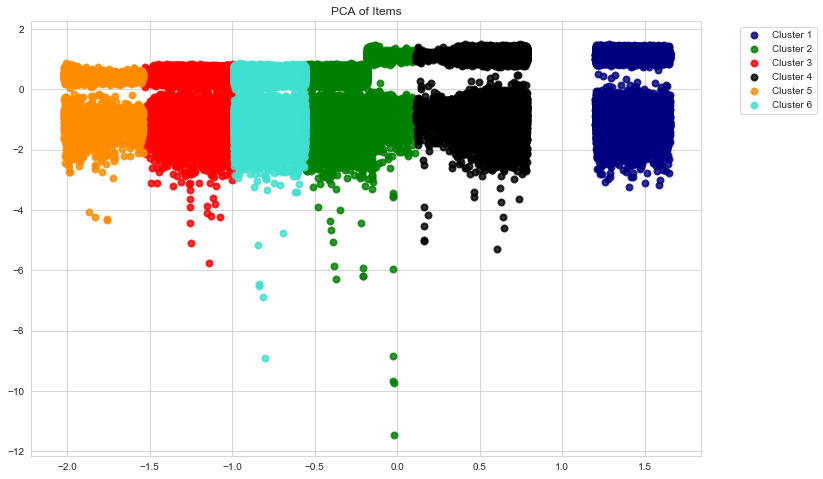

In [29]:
plt.figure(figsize=(12,8))
colors=['navy','green','red','black','darkorange','turquoise']
lw=2

for color,i,target_name in zip(colors,[0,1,2,3,4,5,6],['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7',]):
    plt.scatter(scaled_data[predictions==i,0],scaled_data[predictions==i,1],color=color,alpha=0.8,lw=lw,label=target_name)

plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.6)
plt.title('PCA of Items')
plt.show()



#### Identifying the best number of components for PCA

In [30]:
pca=PCA(n_components=30)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [31]:
total_var=sum(pca.explained_variance_)
var_95=0.95*total_var
print('Total variance is ',total_var)
print('95% of Total Variance is ', var_95)

Total variance is  30.000178573554443
95% of Total Variance is  28.50016964487672


In [32]:
a=zip(range(0,30),pca.explained_variance_)
a=pd.DataFrame(a,columns=['PCA','Explained Variance'])

In [33]:
print('Variance with 3 components: ',sum(a['Explained Variance'][0:3]))
print('Variance with 5 components: ',sum(a['Explained Variance'][0:5]))
print('Variance with 10 components: ',sum(a['Explained Variance'][0:10]))
print('Variance with 15 components: ',sum(a['Explained Variance'][0:15]))
print('Variance with 20 components: ',sum(a['Explained Variance'][0:20]))
print('Variance with 25 components: ',sum(a['Explained Variance'][0:25]))
print('Variance with all components except time: ',sum(a['Explained Variance'][1:30]))
print('Variance with V1-V28 components: ',sum(a['Explained Variance'][1:29]))
print('Variance Amount: ',a['Explained Variance'][2])

Variance with 3 components:  8.740279399485644
Variance with 5 components:  12.403247120710803
Variance with 10 components:  19.614297949279386
Variance with 15 components:  24.857362639824185
Variance with 20 components:  28.39383012332136
Variance with 25 components:  29.72738083511482
Variance with all components except time:  26.454193080932477
Variance with V1-V28 components:  26.450208290555867
Variance Amount:  2.325080551687535


In [34]:
b=zip(range(0,30),pca.explained_variance_ratio_)
b=pd.DataFrame(b,columns=['PCA','Explained Variance Ratio'])

In [35]:
print('Variance Ratio with 3 components: ',sum(b['Explained Variance Ratio'][0:3]))
print('Variance Ratio with 5 components: ',sum(b['Explained Variance Ratio'][0:5]))
print('Variance Ratio with 10 components: ',sum(b['Explained Variance Ratio'][0:10]))
print('Variance Ratio with 15 components: ',sum(b['Explained Variance Ratio'][0:15]))
print('Variance Ratio with 20 components: ',sum(b['Explained Variance Ratio'][0:20]))
print('Variance Ratio with 25 components: ',sum(b['Explained Variance Ratio'][0:25]))
print('Variance Ratio with all components except time: ',sum(b['Explained Variance Ratio'][1:30]))
print('Variance Ratio with V1-V28 components: ',sum(b['Explained Variance Ratio'][1:29]))
print('Variance Ratio Amount: ',b['Explained Variance Ratio'][2])

Variance Ratio with 3 components:  0.2913409124567784
Variance Ratio with 5 components:  0.41343910971398123
Variance Ratio with 10 components:  0.6538060398936977
Variance Ratio with 15 components:  0.8285738226150523
Variance Ratio with 20 components:  0.9464553703807251
Variance Ratio with 25 components:  0.9909067961788702
Variance Ratio with all components except time:  0.8818011871520058
Variance Ratio with V1-V28 components:  0.8816683615967567
Variance Ratio Amount:  0.07750222372799889


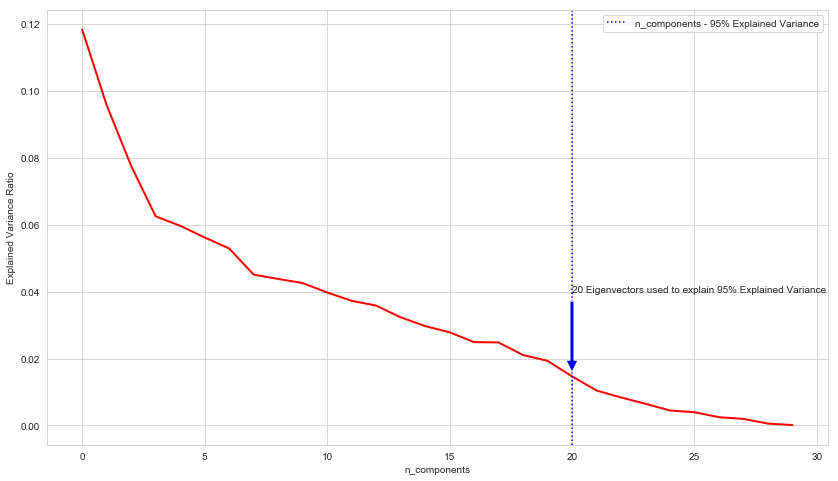

In [36]:
plt.figure(1,figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2,c='r')
plt.xlabel('n_components')
plt.ylabel('Explained Variance Ratio')

plt.axvline(20,linestyle=":",label='n_components - 95% Explained Variance',c='blue')
plt.legend(prop=dict(size=10))
plt.annotate("20 Eigenvectors used to explain 95% Explained Variance",xy=(20,pca.explained_variance_ratio_[20]),xytext=(20, pca.explained_variance_ratio_[10]),arrowprops=dict(facecolor='blue',shrink=0.05))

plt.show()

#### 20 Components explain approximately 95% of the variance due to which I proceeded with PCA with 20 components.

#### Running PCA again with 20 components

The inertia for 2 clusters is 4319370.3438787265
The inertia for 3 clusters is 4026869.864562911
The inertia for 4 clusters is 3820042.7463437095
The inertia for 5 clusters is 3667456.069923018
The inertia for 6 clusters is 3516752.5292101637
The inertia for 7 clusters is 3429779.3534644432
The inertia for 8 clusters is 3330766.466521843
The inertia for 9 clusters is 3244431.634732203
The inertia for 10 clusters is 3177029.710503915
The inertia for 11 clusters is 3093334.9760033633
The inertia for 12 clusters is 3009383.7882772693
The inertia for 13 clusters is 2960221.8759830184
The inertia for 14 clusters is 2891218.697592357
The inertia for 15 clusters is 2837162.2414526767
The inertia for 16 clusters is 2802566.63422289
The inertia for 17 clusters is 2730934.8350590817
The inertia for 18 clusters is 2689573.3339076173
The inertia for 19 clusters is 2646661.2646977697
The inertia for 20 clusters is 2607242.6250506854


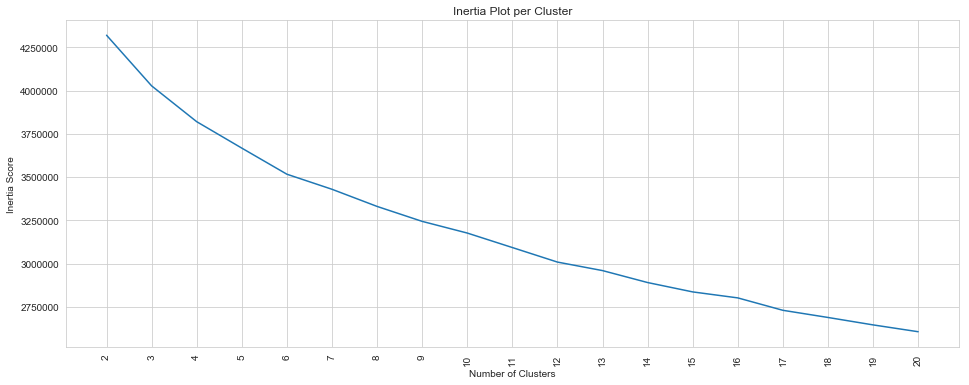

In [37]:
pca=PCA(n_components=20)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

inertia=[]

for i in no_cluster:
    kmeans1=KMeans(n_clusters=i,random_state=1)
    kmeans1=kmeans1.fit(pca_data)
    iner=kmeans1.inertia_
    inertia.append(iner)
    print("The inertia for {} clusters is {}".format(i,iner))
    
fig,(ax1)=plt.subplots(1,figsize=(16,6))
a=np.arange(len(no_cluster))
ax1.plot(a,inertia)
ax1.set_xticks(a)
ax1.set_xticklabels(no_cluster,rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per Cluster');

#### The inertia has decreased which shows that we have managed to improve out resutls by reducing Inertia.

# Module 4

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score
from sklearn.model_selection import KFold, cross_val_score
!pip install imbalanced-learn
import imblearn
from imblearn.under_sampling import NearMiss,RandomUnderSampler

#### Undersampling the Training Data

In [40]:
from sklearn.preprocessing import StandardScaler
credit_card_train['NormAmount']=StandardScaler().fit_transform(credit_card_train['Amount'].values.reshape(-1,1))
X_train=credit_card_train.drop(['Amount','Class','Time'],axis=1)
Y_train=credit_card_train['Class']

In [41]:
fraud_number = len(credit_card_train[credit_card_train['Class'] == 1])
df_normal=credit_card_train[credit_card_train['Class'] == 0].sample(fraud_number, random_state = 8)
undersample_df = df_normal.append(credit_card_train[credit_card_train['Class'] == 1], sort=False).reset_index(drop = True)
print("Percentage of normal transactions: ", undersample_df[undersample_df.Class == 0].shape[0]/undersample_df.shape[0])
print("Percentage of fraudulent transactions: ", undersample_df[undersample_df.Class == 1].shape[0]/undersample_df.shape[0])

Percentage of normal transactions:  0.5
Percentage of fraudulent transactions:  0.5


#### 258 Fraud Transactions were there in the training data, hence total transactions of the training data should be 516

In [42]:
x_under = undersample_df.drop(['Class','Time','Amount'],axis=1)
y_under = undersample_df['Class']
print('Feature matrix: {}\nTarget array: {}'.format(x_under.shape, y_under.shape))

Feature matrix: (516, 29)
Target array: (516,)


#### Making the testing set

In [43]:
credit_card_test=pd.read_csv('creditcard_test.csv')
credit_card_test['NormAmount']=StandardScaler().fit_transform(credit_card_test['Amount'].values.reshape(-1,1))
X_test=credit_card_test.drop(['Amount','Class','Time'],axis=1)
Y_test=credit_card_test['Class']

In [44]:
print('Feature Matrix for Testing {} \nTarget Array for Testing {}'.format(X_test.shape,Y_test.shape))

Feature Matrix for Testing (150, 29) 
Target Array for Testing (150,)


In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#### Support Vector Classifier

In [46]:
clf_SVC=GridSearchCV(SVC(random_state=1),{'C':[0.1,1,10,100,300],'kernel':['poly', 'rbf', 'sigmoid'],'gamma':[1,0.1,0.01,0.001]}
                     ,cv=5,verbose=1,n_jobs=-1,return_train_score=False)

In [47]:
clf_SVC.fit(x_under,y_under.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 300],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [48]:
SVC_results=pd.DataFrame(clf_SVC.cv_results_)
SVC_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010305,0.002732,0.002656,0.001377,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.942308,0.922330,0.902913,0.961165,0.941748,0.934093,0.019847,20
1,0.021872,0.006055,0.008307,0.006262,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.528846,0.495146,0.495146,0.495146,0.495146,0.501886,0.013480,60
2,0.009373,0.007653,0.006249,0.007653,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.759615,0.825243,0.834951,0.786408,0.718447,0.784933,0.042873,48
3,0.009373,0.007653,0.003124,0.006249,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.971154,0.902913,0.912621,0.970874,0.941748,0.939862,0.028467,13
4,0.021873,0.012496,0.003122,0.006245,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.846154,0.844660,0.805825,0.844660,0.922330,0.852726,0.037994,43
5,0.012493,0.011689,0.003124,0.006248,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.855769,0.902913,0.864078,0.893204,0.786408,0.860474,0.040971,42
6,0.012497,0.006249,0.000000,0.000000,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.923077,0.883495,0.854369,0.932039,0.873786,0.893353,0.029597,39
7,0.009372,0.007652,0.000000,0.000000,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.951923,0.893204,0.922330,0.951456,0.951456,0.934074,0.023372,28
8,0.015621,0.009880,0.000000,0.000000,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.932692,0.893204,0.912621,0.941748,0.922330,0.920519,0.016796,32
9,0.015622,0.017112,0.009373,0.007653,0.1,0.001,poly,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.586538,0.563107,0.631068,0.582524,0.495146,0.571677,0.044264,59


#### The above DataFrame summarizes the results of hyperparameter tuning.

In [49]:
print('The best parameters are: ',clf_SVC.best_params_)
print('The best score is: ',clf_SVC.best_score_)

The best parameters are:  {'C': 300, 'gamma': 0.01, 'kernel': 'rbf'}
The best score is:  0.9476661687826737


In [50]:
model_SVC=clf_SVC.best_estimator_
pred_SVC=model_SVC.predict(X_test)

In [51]:
print('Classification report for Training Data Metrics \n')
print(classification_report(y_under,model_SVC.predict(x_under)))

Classification report for Training Data Metrics 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516



In [52]:
print('Classification report for Test Data Metrics \n')
print(classification_report(Y_test,pred_SVC))

Classification report for Test Data Metrics 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       100
           1       0.82      0.94      0.88        50

    accuracy                           0.91       150
   macro avg       0.90      0.92      0.91       150
weighted avg       0.92      0.91      0.91       150



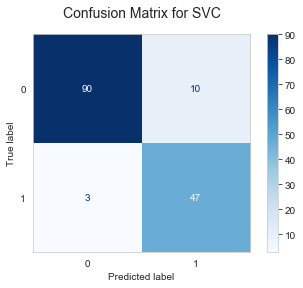

In [53]:
plot_confusion_matrix(clf_SVC,X_test.values,Y_test.values,cmap='Blues');
plt.title('Confusion Matrix for SVC',size=14,y=1.05);
plt.grid(b=None)

In [54]:
print('The ROC AUC Score is: ',roc_auc_score(Y_test,pred_SVC))

The ROC AUC Score is:  0.92


#### Random Forrest Classifier

In [55]:
clf_RFC=GridSearchCV(RandomForestClassifier(random_state=1),{'n_estimators':[50,100,300],'max_depth':[5,8,15,25],'min_samples_split':[2,5,10,15,50]},cv=5,
                                                 return_train_score=False,n_jobs=-1,verbose=1)

In [56]:
clf_RFC.fit(x_under,y_under.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   30.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25],
                         'min_samples_split': [2, 5, 10, 15, 50],
                         'n_estimators': [50, 100, 300]},
             verbose=1)

In [57]:
RFC_results=pd.DataFrame(clf_RFC.cv_results_)
RFC_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.116409,0.011025,0.012497,6.248426e-03,5,2,50,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.971154,0.922330,0.922330,0.941748,0.970874,0.945687,0.021861,9
1,0.226801,0.010690,0.015622,7.168434e-07,5,2,100,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.971154,0.922330,0.922330,0.951456,0.951456,0.943745,0.018907,21
2,0.667076,0.052364,0.050999,9.306325e-03,5,2,300,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.971154,0.922330,0.922330,0.941748,0.951456,0.941804,0.018510,46
3,0.123287,0.005821,0.005984,7.569314e-03,5,5,50,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.971154,0.922330,0.912621,0.941748,0.951456,0.939862,0.020816,57
4,0.279460,0.049190,0.020875,5.738406e-03,5,5,100,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.971154,0.922330,0.922330,0.951456,0.951456,0.943745,0.018907,21
5,0.728940,0.061579,0.051861,5.389280e-03,5,5,300,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.971154,0.922330,0.922330,0.951456,0.951456,0.943745,0.018907,21
6,0.109307,0.005224,0.009774,3.988982e-04,5,10,50,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.971154,0.922330,0.922330,0.941748,0.961165,0.943745,0.019879,21
7,0.196075,0.002239,0.017155,1.465577e-03,5,10,100,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.971154,0.922330,0.922330,0.951456,0.951456,0.943745,0.018907,21
8,0.580647,0.004433,0.044083,1.162941e-03,5,10,300,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.971154,0.922330,0.922330,0.941748,0.951456,0.941804,0.018510,46
9,0.104916,0.005728,0.009377,4.869819e-04,5,15,50,"{'max_depth': 5, 'min_samples_split': 15, 'n_e...",0.971154,0.922330,0.922330,0.941748,0.961165,0.943745,0.019879,21


#### The above DataFrame summarizes the results of hyperparameter tuning.

In [58]:
print('The best parameters are: ',clf_RFC.best_params_)
print('The best score is: ',clf_RFC.best_score_)

The best parameters are:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 50}
The best score is:  0.9495519044062734


In [59]:
model_RFC=clf_RFC.best_estimator_
pred_RFC=model_RFC.predict(X_test)

In [60]:
print('Classification report for Training Data Metrics \n')
print(classification_report(y_under,model_RFC.predict(x_under)))

Classification report for Training Data Metrics 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       258
           1       1.00      0.99      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516



In [61]:
print('Classification report for Testing Data Metrics \n')
print(classification_report(Y_test,pred_RFC))

Classification report for Testing Data Metrics 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.90      0.94      0.92        50

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150



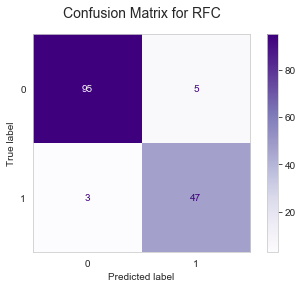

In [62]:
plot_confusion_matrix(clf_RFC,X_test.values,Y_test.values,cmap='Purples');
plt.title('Confusion Matrix for RFC',size=14,y=1.05);
plt.grid(b=None)

In [63]:
print('The ROC AUC Score is: ',roc_auc_score(Y_test,pred_RFC))

The ROC AUC Score is:  0.945


#### Gaussian Process Classifier

In [64]:
clf_GPC=GridSearchCV(GaussianProcessClassifier(random_state=1),{'multi_class':['one_vs_rest', 'one_vs_one']}
                                        ,cv=5,n_jobs=-1,return_train_score=False)

In [65]:
clf_GPC.fit(x_under,y_under.values.ravel())

GridSearchCV(cv=5, estimator=GaussianProcessClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'multi_class': ['one_vs_rest', 'one_vs_one']})

In [66]:
GPC_results=pd.DataFrame(clf_GPC.cv_results_)
GPC_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.178915,0.014159,0.003124,0.006248,one_vs_rest,{'multi_class': 'one_vs_rest'},0.971154,0.92233,0.902913,0.932039,0.970874,0.939862,0.02711,1
1,0.144230,0.015805,0.009373,0.007653,one_vs_one,{'multi_class': 'one_vs_one'},0.971154,0.92233,0.902913,0.932039,0.970874,0.939862,0.02711,1


#### The above DataFrame summarizes the results of hyperparameter tuning.

In [67]:
print('The best parameters are: ',clf_GPC.best_params_)
print('The best score is: ',clf_GPC.best_score_)

The best parameters are:  {'multi_class': 'one_vs_rest'}
The best score is:  0.9398618371919344


In [68]:
model_GPC=clf_GPC.best_estimator_
pred_GPC=model_GPC.predict(X_test)

In [69]:
print('Classification report for Training Data Metrics \n')
print(classification_report(y_under,model_GPC.predict(x_under)))

Classification report for Training Data Metrics 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516



In [70]:
print('Classification report for Testing Data Metrics \n')
print(classification_report(Y_test,pred_GPC))

Classification report for Testing Data Metrics 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.89      0.94      0.91        50

    accuracy                           0.94       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.94      0.94       150



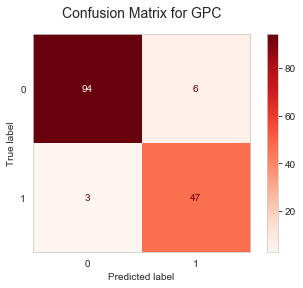

In [71]:
plot_confusion_matrix(clf_GPC,X_test.values,Y_test.values,cmap='Reds');
plt.title('Confusion Matrix for GPC',size=14,y=1.05);
plt.grid(b=None)

In [72]:
print('The ROC AUC Score is: ',roc_auc_score(Y_test,pred_GPC))

The ROC AUC Score is:  0.94
